    A heap is a data structure which uses a binary tree for its implementation.(there are also d-heaps which a parent node can have d children) It is the base of the algorithm heapsort and is also used to implement priority queue. It is basically a complete binary tree and generally implemented using an array.
    A complete binary tree of height h has between 2^h and 2^(h + 1) − 1 nodes and the height of a complete binary tree is b logN(N is the number of elements).

    A heap is implemented using a complete binary tree and thus follows its properties, but it has some additional properties which differentiate it from a normal binary tree. Basically, we implement two kinds of heaps:

    Max Heap →  In a max-heap, the value of a node is either greater than or equal to the value of its children.

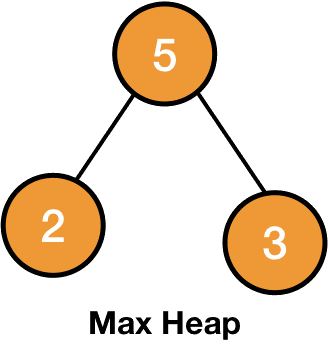

    Min Heap → The value of a node is either smaller than or equal to the value of its children.

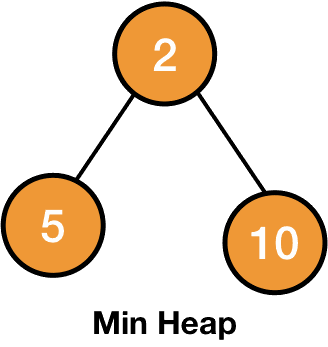

    Thus in a max-heap, the largest element is at the root and in a min-heap, the smallest element is at the root.

### Heapify

    Heapify is an operation applied on a node of a heap to maintain the heap property. It is applied on a node when its children (left and right) are heap (follow the property of heap) but the node itself may be violating the property.

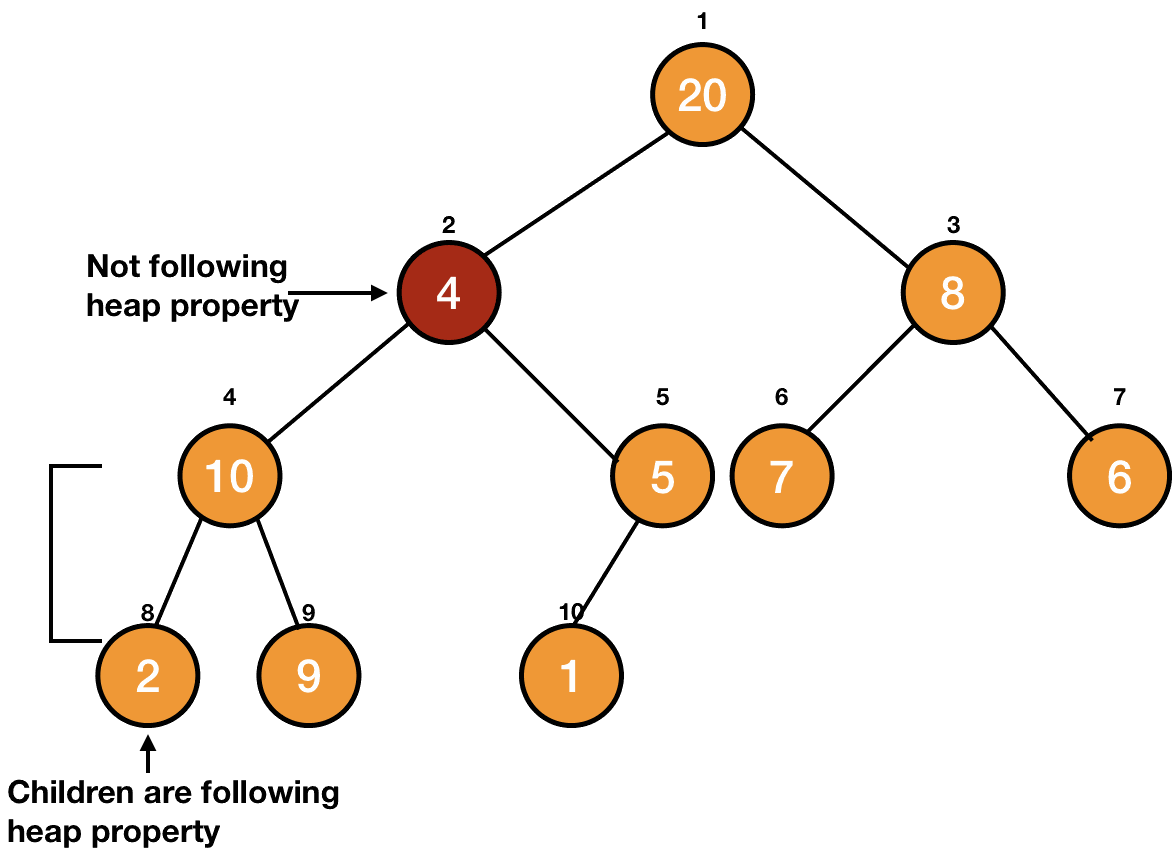


    We simply make the node travel down the tree until the property of the heap is satisfied. It is illustrated on a max-heap in the picture given below. (This process is also called percolate down)

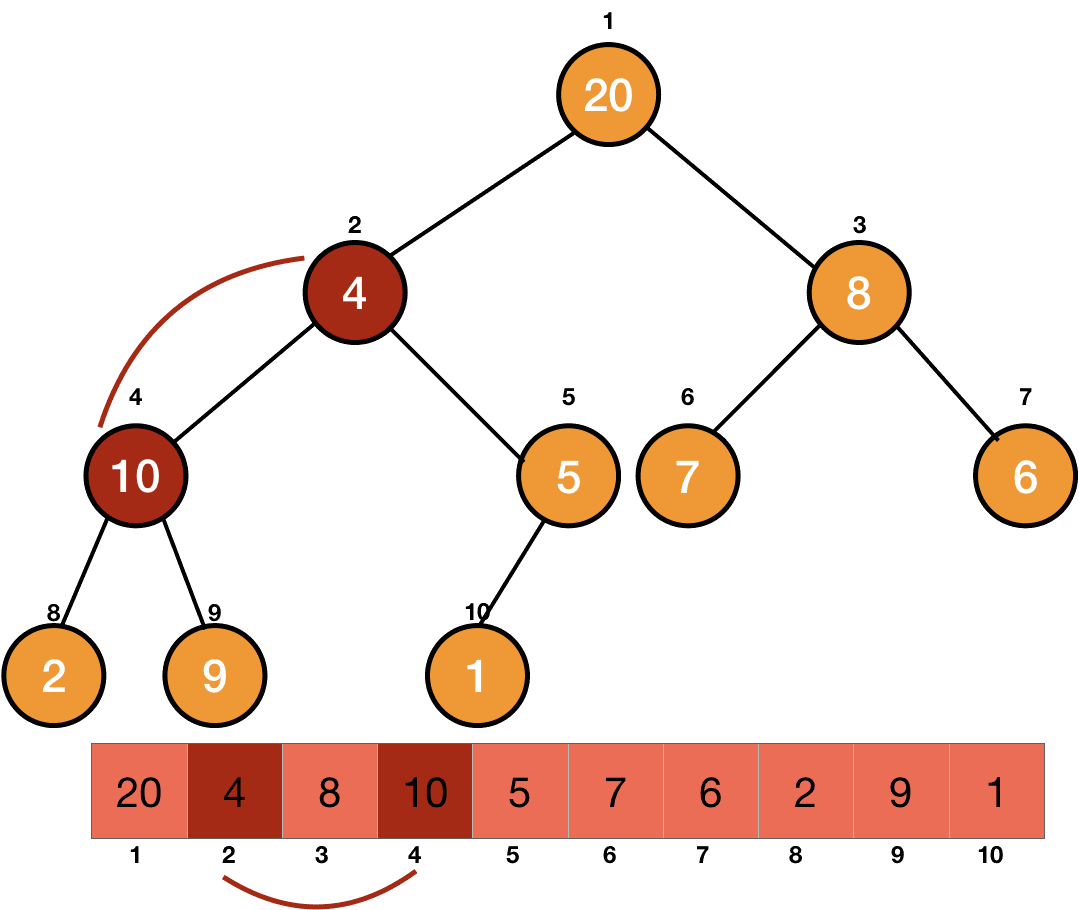

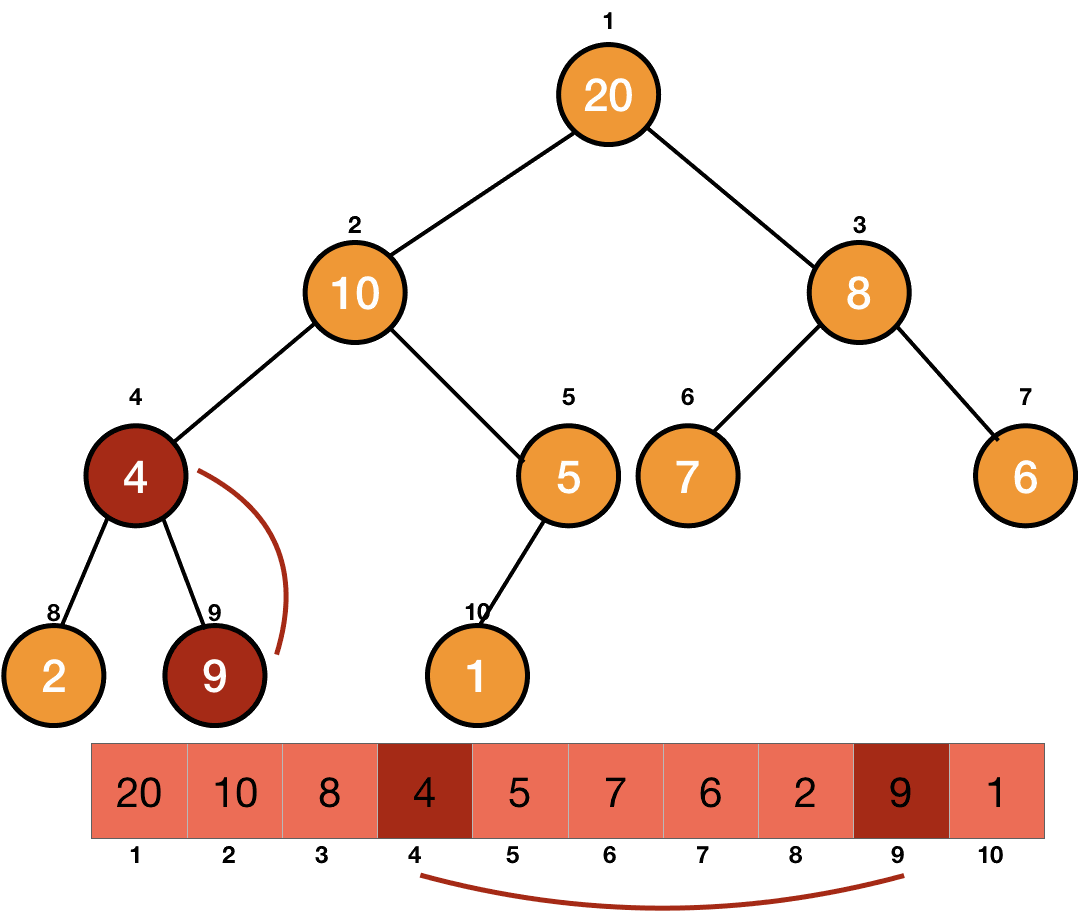

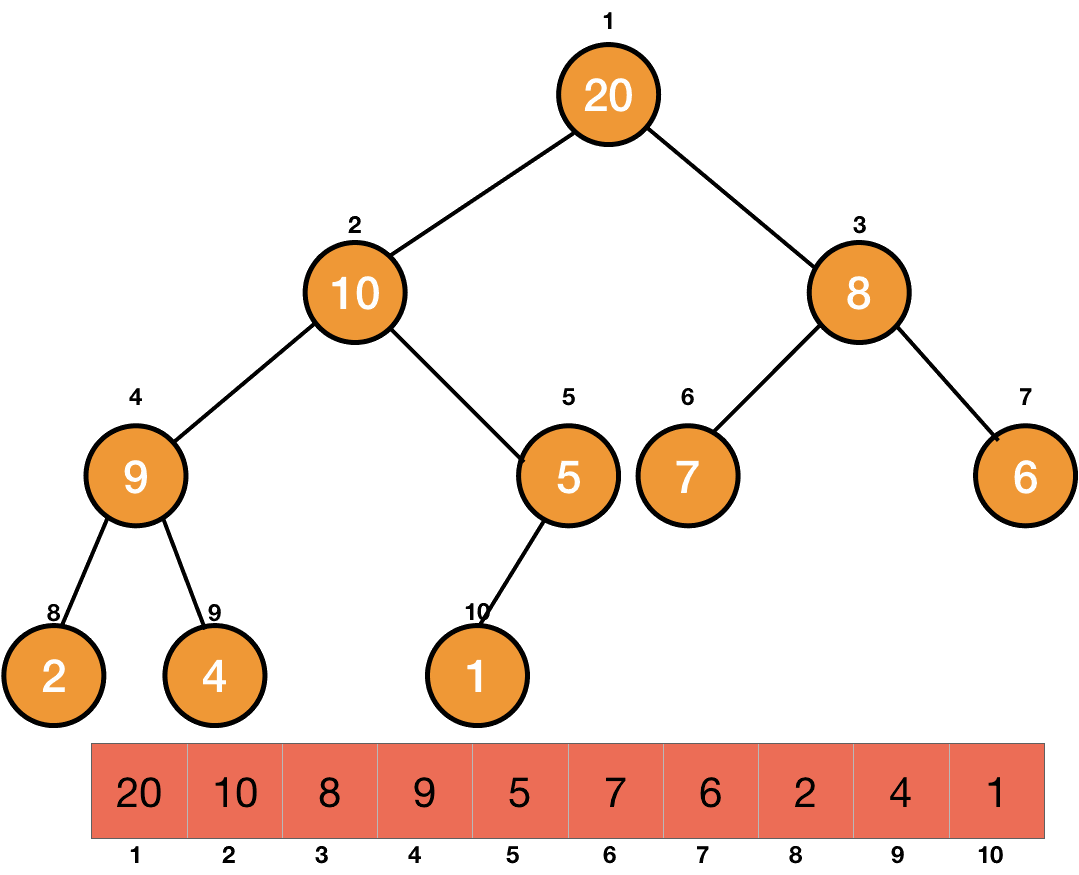

    You can see that after the completion of the Heapify operation, the tree is now a heap.

In [9]:
def MAX_HEAPIFY(A, i): # A is the array for the implementation of heap and i is the node.
    left = 2*(i - 1)
    right = 2*(i - 1) - 1

    #checking for largest among left, right and node i
    largest = i
    if left <= len(A):
        if (A[left] > A[largest]):
            largest = left

    if right <= len(A):
        if(A[right] > A[largest]):
            largest = right

    if largest != i: #node is not the largest, we need to swap
        A[i], A[largest] = A[largest], A[i]
        print(A, i, largest)
        MAX_HEAPIFY(A, largest)  #child after swapping might be violating max-heap property so we are heapifying it again.
    return A

print(MAX_HEAPIFY([20, 4, 8, 10, 5, 7, 6, 2, 9, 1], 2))

[20, 4, 8, 10, 5, 7, 6, 2, 9, 1]


Heap structure'ının genel yapısı

In [29]:
heap_size = 10

def get_right_child(A, index):
    right = 2*index + 1
    if index > 0 and right < len(A):
        return right
    return -1

def get_left_child(A, index):
    left = 2*index
    if index > 0 and left < len(A):
        return left
    return -1

def get_parent(A, index):
    parent = index//2
    if index < len(A) and parent > 0: 
        return parent
    return -1

def max_heapify(A, index):
    left_child_index = get_left_child(A, index)
    right_child_index = get_right_child(A, index)
    
    
    largest = index
    
    if 0 < left_child_index <= heap_size and A[left_child_index] > A[largest]:
        largest = left_child_index
        
    if 0 < left_child_index <= heap_size and A[right_child_index] > A[largest]:
        largest = right_child_index

    #if largest changed, then change the node and continue to heapify.
    if(largest != index):
        A[index], A[largest] = A[largest], A[index]
        max_heapify(A, largest)
    

def build_max_heap(A):
    for i in range(heap_size//2, 0, -1):
        max_heapify(A, i)

if __name__ == '__main__':
    # tree is starting from index 1 and not 0
    A = [0, 15, 20, 7, 9, 5, 8, 6, 10, 2, 1]
    build_max_heap(A)
    print(A[1:heap_size+1])

[20, 15, 8, 10, 5, 7, 6, 9, 2, 1]


## Priority Queue

    Priority queue is a type of queue in which every element has a key associated to it and the queue returns the element according to these keys.

    Thus, a max-priority queue returns the element with the maximum key first whereas, a min-priority queue returns the element with the smallest key first.

    Heaps are great for implementing a priority queue because of the largest and the smallest element at the root of the tree for a max-heap and a min-heap respectively. We use a max-heap for a max-priority queue and a min-heap for a min-priority queue.

    There are mainly 4 operations we want from a priority queue:

    1. Insert → To insert a new element in the queue.

    2. Maximum/Minimum → To get the maximum and the minimum element from the max-priority queue and min-priority queue respectively.

    3. Extract Maximum/Minimum → To remove and return the maximum and the minimum element from the max-priority queue and min-priority queue respectively.

    4. Increase/Decrease key → To increase or decrease the key of any element in the queue.

    A priority queue stores its data in a specific order according to the keys of the elements. So, inserting a new data must go in a place according to the specified order. This is what the insert operation does.

    The entire point of priority queue is to get the data according to the key of the data and the Maximum/Minimum and Extract Maximum/Minimum operation do this for us.

    Maximum/Minimum

    We know that the maximum (or minimum) element of a priority queue is at the root of the max-heap (or min-heap). So, we just need to return the element at the root of the heap.

    MAXIMUM(A) ->  return A[1]

    MİNİMUM(A) ->  return A[-1]

    constant time taking process, so it is a Θ(1) process.

    Extract Maximum/Minimum

    We return the maximum (or minimum) element as well as delete it from the heap. So, we have to return and delete the root of a heap. Firstly, we store the value of the root in a variable to return it later from the function and then we just make the root equal to the last element of the heap. Now that the root is equal to the last element of the heap, we delete the last element easily and reduce the size of the heap by 1.

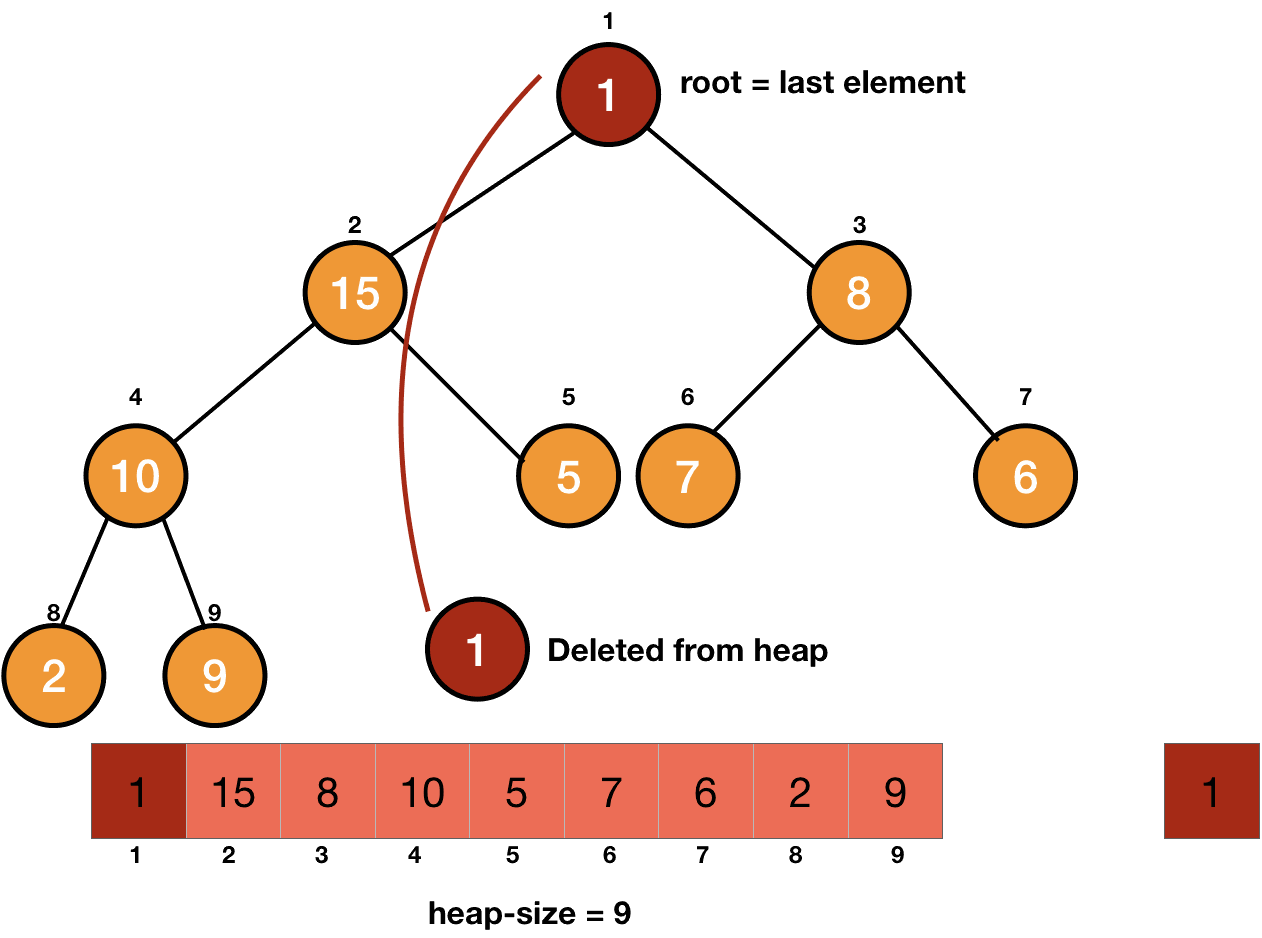

    Doing this, we have disturbed the heap property of the root but we have not touched any of its children, so they are still heaps. So, we can call Heapify on the root to make the tree a heap again.

    EXTRACT-MAXIMUM(A)

    max = A[1] // storing maximum value

    A[1] = A[heap_size] // making root equal to the last element

    heap_size = heap_size-1 // delete last element

    MAX-HEAPIFY(A, 1) // root is not following max-heap property

    return max //returning the maximum value


    In worst case heapify operation will take O(logn) time and thus the Extract Maximum/Minimum is going to take O(logn) time.(extracting maximum causes to heapify work as in the worst case) 

    Increase/Decrease key

    Whenever we change the key of an element, we must change its position to go in a place of correct order according to the new key. If the heap is a max-heap and we are decreasing the key, then we just need to check if the key became smaller than any of its children or not. If the new key is smaller than any of its children, then it is violating the heap property. In that case, we will call Heapify on it.

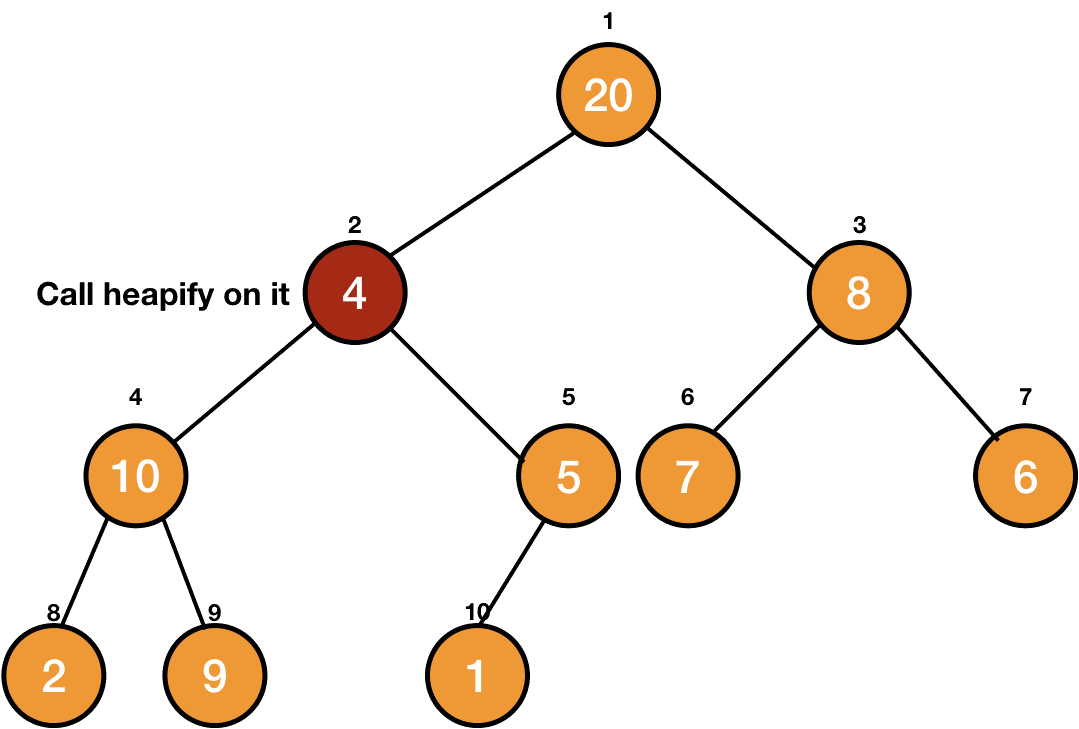

    In the case of increasing the key of an element in a max-heap, we might make it greater than the key of its parent and thus violating the heap property. In this case, we swap the values of the parent and the node and this is done until the parent of the node becomes greater than the node itself. This general strategy is known as a percolate up.


    Code 

    INCREASE-KEY(A, i, key):

    A[i] = key // changing key

    while i > 1 and A[Parent(i)] < A[i] // if parent is less than A[i], we will swap.

      swap (A[i], A[Parent(i)])

      i = Parent(i)

    DECREASE-KEY(A, i, key):

    A[i] = key // changing key

    MAX-HEAPIFY(A, i)

Implementation of max-priority queue properties.

In [2]:
heap_size = 0
tree_array_size = 11
INF = 100000


def get_right_child(A, index):
    right = 2*index + 1
    if index > 0 and right < len(A):
        return right
    return -1

def get_left_child(A, index):
    left = 2*index
    if index > 0 and left < len(A):
        return left
    return -1

def get_parent(A, index):
    parent = index//2
    if index < len(A) and parent > 0: 
        return parent
    return -1

def max_heapify(A, index):
    left_child_index = get_left_child(A, index)
    right_child_index = get_right_child(A, index)
    
    
    largest = index
    
    if 0 < left_child_index <= heap_size and A[left_child_index] > A[largest]:
        largest = left_child_index
        
    if 0 < left_child_index <= heap_size and A[right_child_index] > A[largest]:
        largest = right_child_index

    #if largest changed, then change the node and continue to heapify.
    if(largest != index):
        A[index], A[largest] = A[largest], A[index]
        max_heapify(A, largest)

def maximum(A):
    return A[1]

def insert(A , key):
    global heap_size
    heap_size = heap_size+1
    A[heap_size] = -1*INF
    increase_key(A, heap_size, key)
    
    
def extract_max(A):
    global heap_size
    minm = A[1]
    A[1] = A[heap_size] # put the minimum 
    heap_size = heap_size-1
    max_heapify(A, 1)
    return minm

# We are swapping node with parent until parent's value is bigger than node's value.
def increase_key(A, index, key):
    A[index] = key
    parent_index = get_parent(A, index)
    while((index>1) and (A[parent_index] < A[index])):
        A[index], A[parent_index] = A[parent_index], A[index]
        index = parent_index

def decrease_key(A, index, key):
    A[index] = key
    max_heapify(A, index)

# elemanları en başta tek seferde aldığımız bir durumda tek tek hepsi üzerinde insert yapmak yerine(worst ->O(n*logn)
# average -> O(logn)) elemanları direk binary tree'ye koyup sondan bir önceki satırdan başlayıp geriye doğru elemanlara
# heapify uygulayabiliriz.(son satıra gerek yok) Bu, işlemi O(n) time içinde yapmamızı sağlar.
def build_max_heap(A):
    for i in range(heap_size//2, 0, -1):
        max_heapify(A, i)
    
if __name__ == '__main__':
    A = [None]*tree_array_size

    insert(A, 20)
    insert(A, 15)
    insert(A, 8)
    insert(A, 10)
    insert(A, 5)
    insert(A, 7)
    insert(A, 6)
    insert(A, 2)
    insert(A, 9)
    insert(A, 1)

    print(A[1:heap_size+1])

    increase_key(A, 5, 22)
    print(A[1:heap_size+1])

    print(maximum(A))
    print(extract_max(A))

    print(A[1:heap_size+1])

    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    print(extract_max(A))
    
    #Buradan da görüldüğü üzere heap yapısından her seferinde en baştaki elemanı çıkarırsak elemanları büyükten küçüğe doğru sıralamış oluruz. 

[20, 15, 8, 10, 5, 7, 6, 2, 9, 1]
[20, 22, 8, 10, 15, 7, 6, 2, 9, 1]
20
20
[22, 15, 8, 10, 1, 7, 6, 2, 9]
22
15
10
9
8
7
6
2
1


### HeapSort

Heapsort is implemented using a max-heap. In a max-heap, the maximum element is at the root of the tree and is also the first element of the array i.e., A[1].


<div>
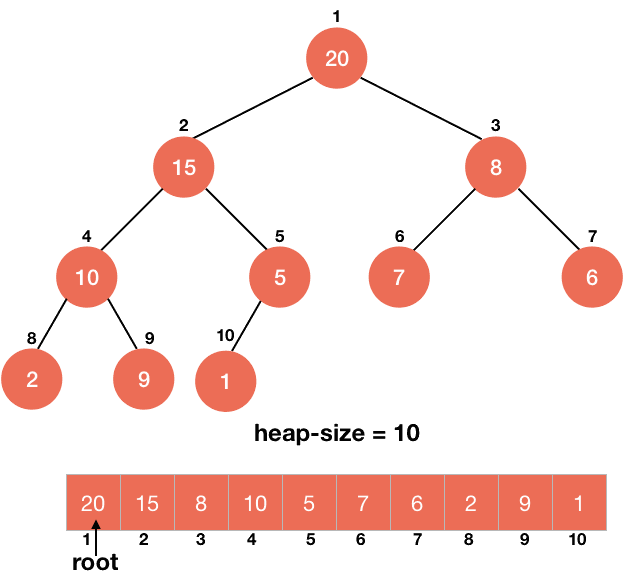
</div>

By iteratively extracting maximum element, we can sort the array.

The analysis of the heapsort is simple. There is a while loop which is running n times and each time it is executing 3 statements(inside extract_max function). The first two statements (swap(A[1], A[A.heap_size]) and A.heap_size = A.heap_size-1) will take a constant time but the last statement i.e., MAX-HEPAPIFY(A, 1) is going to take 
O
(
lg
n
)
 time. So, the algorithm is going to take a total of 
O
(
n
lg
n
)
 time

In [50]:
def heapsort(A):
    global heap_size
    sortedA = []
    while(heap_size > 0):
        root = extract_max(A)
        A.pop()
        print(A)
        sortedA = [root] + sortedA
    return sortedA
        
A = [None]*tree_array_size
insert(A, 20)
insert(A, 15)
insert(A, 8)
insert(A, 10)
insert(A, 5)
insert(A, 7)
insert(A, 6)
insert(A, 2)
insert(A, 9)
insert(A, 1)
print(heapsort(A))

[None, 15, 10, 8, 9, 5, 7, 6, 2, 1]
[None, 10, 9, 8, 2, 5, 7, 6, 1]
[None, 9, 5, 8, 2, 1, 7, 6]
[None, 8, 5, 7, 2, 1, 6]
[None, 7, 5, 6, 2, 1]
[None, 6, 5, 1, 2]
[None, 5, 2, 1]
[None, 2, 1]
[None, 1]
[None]
[1, 2, 5, 6, 7, 8, 9, 10, 15, 20]


    Heap kullanılabilecek sorular
    
    
    There are n different online courses numbered from 1 to n. You are given an array courses where courses[i] = [durationi, lastDayi] indicate that the ith course should be taken continuously for durationi days and must be finished before or on lastDayi.

    You will start on the 1st day and you cannot take two or more courses simultaneously.

    Return the maximum number of courses that you can take.

In [1]:
import heapq

#Soruyu şu hale getirebiliriz: Bize verilen course'ları belirli bir sırada(bitme sırasına göre) tek tek ekliyeceğiz.(heap ekleme
# işlemi) Eğer yeni eklediğimiz course'da o anki time değeri o course'ın biteceği süreyi aşarsa bu sefer eklediğimiz course'lar
#arasında en fazla süren kursu(heap pop işlemi) çıkarıyoruz ve yeni course'ları eklemeye devam ediyoruz. 
def scheduleCourse(courses):
    courses.sort(key = lambda x: x[1])

    time = 0
    heap = []
    for t, end in courses: 
        time += t
        heapq.heappush(heap, -t)
        if time > end:
            time += heapq.heappop(heap)

    return len(heap)

    You are given a 2D integer array intervals, where intervals[i] = [lefti, righti] describes the ith interval starting at lefti and ending at righti (inclusive). The size of an interval is defined as the number of integers it contains, or more formally righti - lefti + 1.

    You are also given an integer array queries. The answer to the jth query is the size of the smallest interval i such that lefti <= queries[j] <= righti. If no such interval exists, the answer is -1.

    Return an array containing the answers to the queries.

In [2]:
def minInterval(intervals, queries):

    intervals.sort()

    heap = []
    res = {}
    ind = 0
    for q in sorted(queries): 
        while heap and heap[0][1] < q: 
            heapq.heappop(heap)

        while ind < len(intervals) and intervals[ind][0] <= q:
            left, right = intervals[ind]
            if q <= right: 
                heapq.heappush(heap, [right - left + 1, right])
            ind += 1

        if heap: 
            res[q] = heap[0][0]
        else: 
            res[q] = -1

    return [res[q] for q in queries]